<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

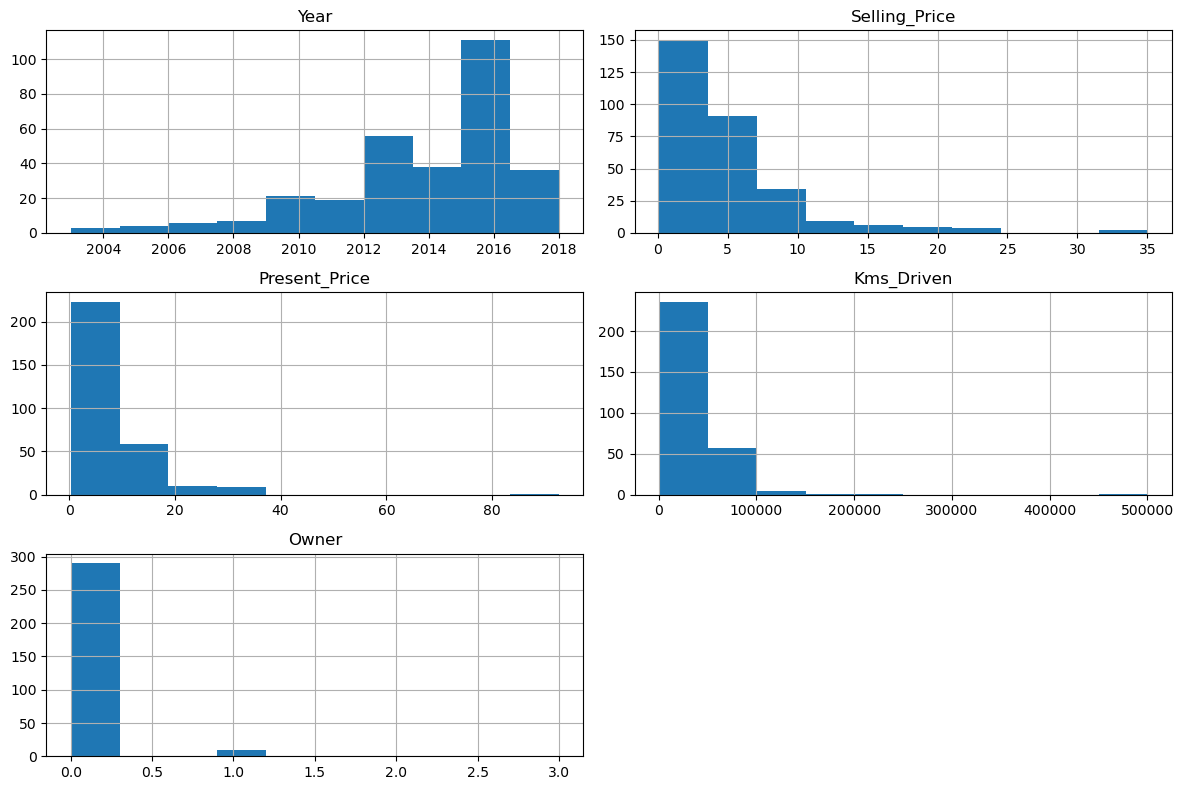

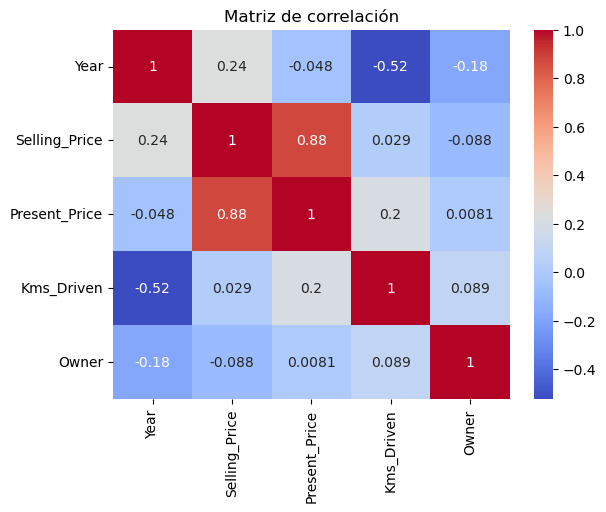

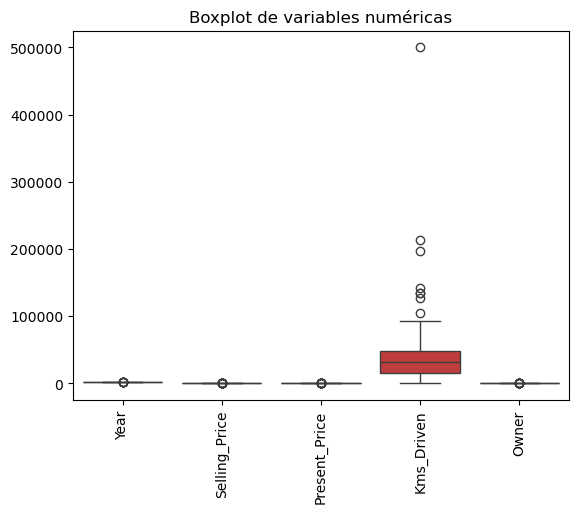

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("car data.csv")  # cambia por tu archivo

# Info general
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Distribución de variables
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Correlación
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# Valores atípicos
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot de variables numéricas")
plt.show()


In [82]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Lidiar con valores faltantes
df.fillna(df.median(numeric_only=True), inplace=True)  # o df.dropna()

# Codificar variables categóricas
df = pd.get_dummies(df, drop_first=True)


In [96]:
# Verifica si hay valores nulos
print(X.isnull().sum())
print(y.isnull().sum())

# Solución rápida (rellenar con la mediana o eliminar)
X = X.fillna(X.median(numeric_only=True))
y = y.fillna(y.median())



year                         0
km_driven                    0
seats                      221
fuel_Diesel                  0
fuel_LPG                     0
                          ... 
torque_99.04Nm@ 4500rpm      0
torque_99.07Nm@ 4500rpm      0
torque_99.1Nm@ 4500rpm       0
torque_99.8Nm@ 2700rpm       0
torque_99Nm@ 4500rpm         0
Length: 1286, dtype: int64
0


In [102]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Variable objetivo
y = df['Selling_Price']

# 2. Variables predictoras (quitamos la columna objetivo)
X = df.drop('Selling_Price', axis=1)

# 3. Por si hay valores nulos (opcional pero recomendable)
X = X.fillna(X.median(numeric_only=True))
y = y.fillna(y.median())

# 4. Selección de características (usamos f_regression porque el target es numérico)
k = min(10, X.shape[1])  # por si hay menos de 10 columnas
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# 5. Mostramos las columnas seleccionadas
selected_columns = X.columns[selector.get_support()]
print("Características seleccionadas:\n", selected_columns)

# 6. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)





Características seleccionadas:
 Index(['Year', 'Present_Price', 'Car_Name_city', 'Car_Name_fortuner',
       'Car_Name_innova', 'Car_Name_land cruiser', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       31000       0.00      0.00      0.00         1
       31504       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       42000       0.00      0.00      0.00         1
       45000       0.00      0.00      0.00         3
       45957       0.00      0.00      0.00         1
       50000       0.00      0.00      0.00         2
       55000       0.00      0.00      0.00         3
       56000       0.00      0.00      0.00         1
       58000       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         5
       65000       0.00      0.00      0.00         5
       68000       0.00      0.00      0.00         1
       70000       0.00      0.00      0.00         9
       75000       0.00      0.00      0.00         2
       78000   

C:\Users\mauri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mauri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mauri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mauri\anaconda3\Lib\site-packages\sklea

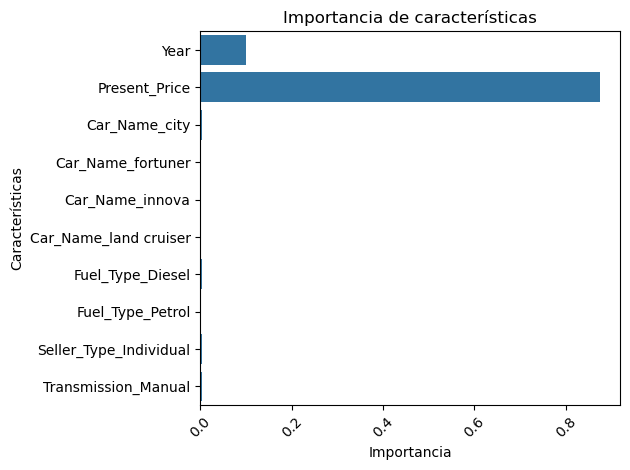

In [104]:
# Asegúrate de tener todo esto listo antes del gráfico
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de características
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]

# Entrenamiento modelo (por ejemplo RandomForest)
model = RandomForestRegressor(random_state=42)
model.fit(X_new, y)

# Importancia de características
importances = model.feature_importances_

# Gráfico de importancia
sns.barplot(x=importances, y=selected_columns)
plt.title("Importancia de características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

